In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lvm_read

# read txt file

In [34]:
filename = './time_noise.txt'
with open(filename, 'rb') as f:
    content_1 = f.read()

In [35]:
Time = [np.float(time[2:-1]) for time in content_1.split('][')[:1][0].split(',')]

In [36]:
filename = './value_noise.txt'
with open(filename, 'rb') as f:
    content_2 = f.read()

In [37]:
Value = []
for i in range(len(content_2.split(']['))):
    content_2_list =  content_2.split('][')[i].split(',')

    value =  [np.float(x[2:-2]) for x in content_2_list]

    Value.append(value)

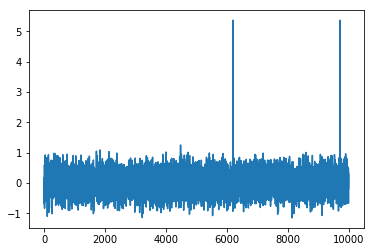

In [38]:
plt.plot(Time,Value[0])

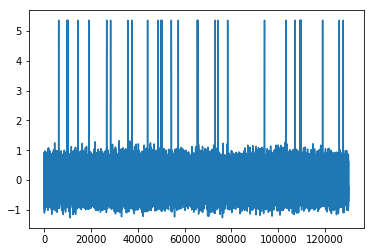

In [39]:
Noise = np.array(Value).flatten()
plt.plot(Noise)

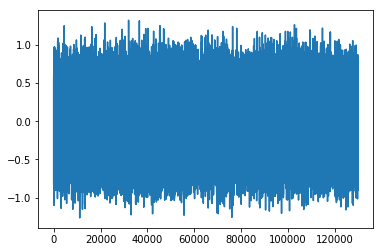

In [40]:
Noise = np.array(Value).flatten()
index = np.where(Noise<2)
Noise=Noise[index]
plt.plot(Noise)

In [42]:
len(Value)

13

# FFT

## example

In [108]:
import matplotlib.pyplot as plt 
import numpy as np 
def show(ori_func, ft, sampling_period = 10.0): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    nfft = abs(ft[range(int(n / 2))] / n ) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.savefig('fft.pdf')
    plt.show() 
    
    U_value = pd.DataFrame(columns=['time','U'])
    U_value['time'] = np.arange(0, sampling_period, interval)
    U_value['U'] = ori_func
    U_value.to_csv('U_value.csv')
    F_value = pd.DataFrame(columns=['Freq','Amps'])
    F_value['Freq'] = frequency
    F_value['Amps'] = nfft
    F_value.to_csv('F_value.csv')

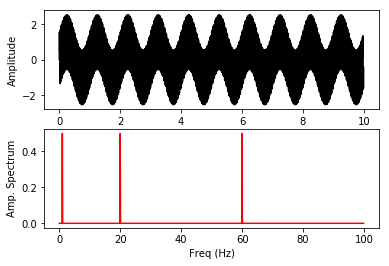

In [32]:
time = np.arange(0, 10, .005) 
x = np.sin(2 * np.pi * 1 * time)
x2 = np.sin(2 * np.pi * 20 * time) 
x3 = np.sin(2 * np.pi * 60 * time) 
x += x2 + x3 
y = np.fft.fft(x) 
show(x, y) 

## fft_for_data

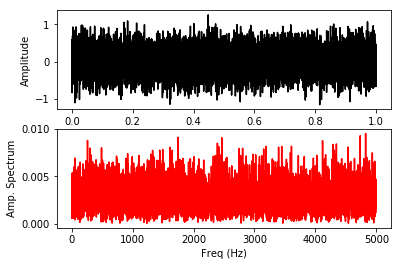

In [109]:
value = np.array(Value[0])
index = np.where(value<2)
data = value[index]
ydata = np.fft.fft(data)
show(data,ydata,sampling_period=1.0)


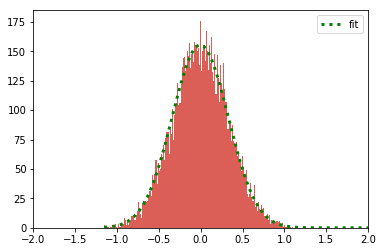

popt [ 1.55344697e+02 -6.27510515e-03  3.34753314e-01]


In [113]:
from scipy.optimize import curve_fit 
from scipy import asarray as ar,exp 

n, bins, patches = plt.hist(Value[0],500,density =False)


def gaus(x,a,x0,sigma): 
    return a*exp(-(x-x0)**2/(2*sigma**2)) 

popt,pcov = curve_fit(gaus,bins[:-1],n) 

plt.plot(bins[:-1],gaus(bins[:-1],*popt),'g:',linewidth=3,label='fit') 

Gauss_value = pd.DataFrame(columns=['V_value','count'])
Gauss_value['V_value'] = bins[:-1]
Gauss_value['count'] = n
Gauss_value.to_csv('Gauss_value.csv')

Fit_value = pd.DataFrame(columns=['V_value','count'])
Fit_value['V_value'] = bins[:-1]
Fit_value['count'] = gaus(bins[:-1],*popt)
Fit_value.to_csv('Fit_value.csv')

plt.legend() 
plt.xlim(-2,2)
plt.savefig('gaussian.pdf')
plt.show()
print 'popt',popt

In [656]:
M = np.array(Content_2).flatten()
index1 = np.where(M<-2.85)
M1=M[index1]
len(M1)

1345714

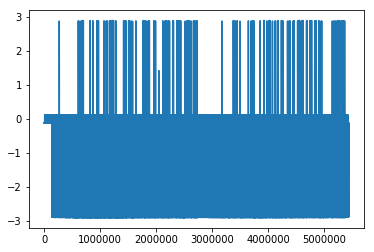

In [657]:
plt.plot(M)

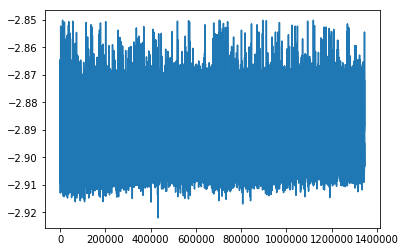

In [658]:
plt.plot(M1)

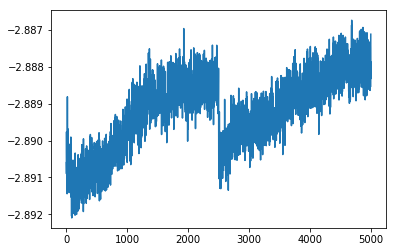

In [666]:
M11=np.array(M1[:1345000].reshape(5000,-1 ))
plt.plot(np.average(M11,axis=1))

In [628]:
Y = np.array(Content_2).flatten()
index1 = np.where(Y<-2.85)
Y1=Y[index1]
len(Y1)

84677

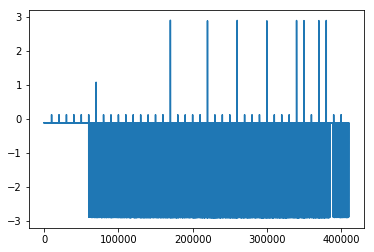

In [624]:
startp=1000000
step=10000
plt.plot(Y)

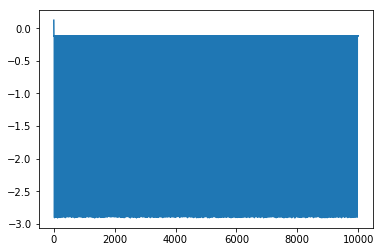

In [619]:

#fig=plt.figure(figsize=(15,6))
startp=400000
step=10000
plt.plot(Y[startp:startp+step])

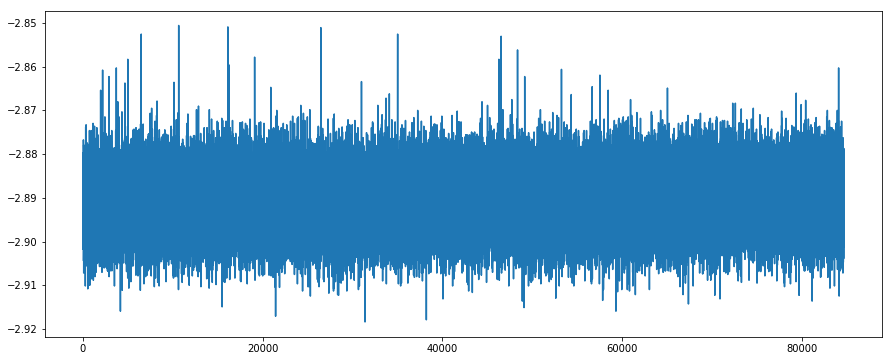

In [629]:
fig=plt.figure(figsize=(15,6))
plt.plot(Y1)

In [651]:
sss=np.arange(100)
sss2=sss.reshape(10,-1 )
np.average(sss2,axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5])

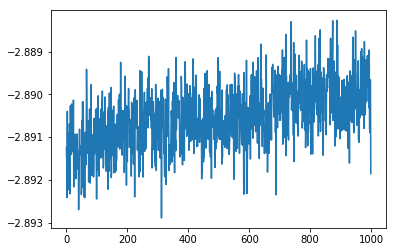

In [649]:
Y11=np.array(Y1[:84000].reshape(1000,-1 ))
plt.plot(np.average(Y11,axis=1))

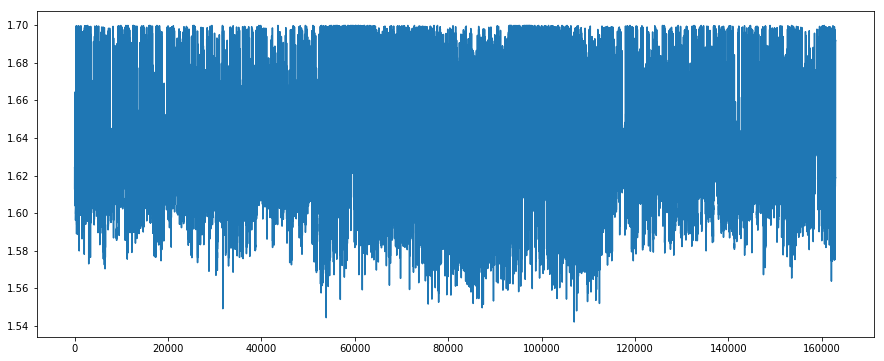

In [357]:
fig=plt.figure(figsize=(15,6))
plt.plot(Y2)

In [343]:
1/33333.0

3.000030000300003e-05

In [316]:
len(Y2)

143748

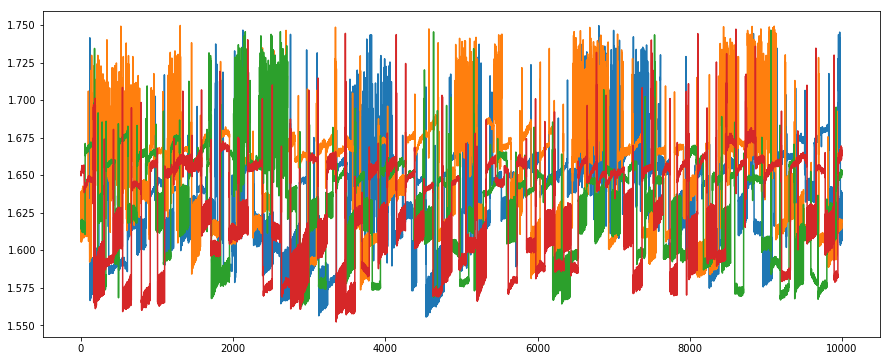

In [320]:
fig=plt.figure(figsize=(15,6))
for i in range(4):
    plt.plot(Y2[10000*i:10000*(i+1)])

In [143]:
filename = './test.txt'
with open(filename, 'a') as f:
    f.write([2])
filename = './test.txt'
with open(filename, 'r+') as f:
    content = f.readlines()

TypeError: expected a string or other character buffer object

In [132]:
content

['hello']

## read with file_read

In [372]:
Time = []
V = []

for i in range(1,11):
    filename = 'b%s.lvm'%i
    with open(filename, 'rb') as f:
        content = f.readlines()

    datas = content[23:-1]

    for data in datas:
        data = data.split('\t')
        time = np.float(data[2])
        v = np.float(data[3])
        Time.append(time)
        V.append(v)

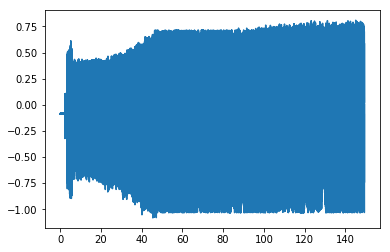

In [373]:
plt.plot(Time,V)


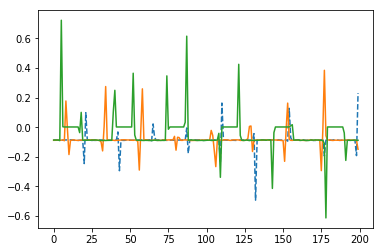

In [396]:
plt.plot(V[80000:80200],'--')
plt.plot(V[280000:280200])
plt.plot(V[-290200:-290000])

In [379]:
len(V)

2240480

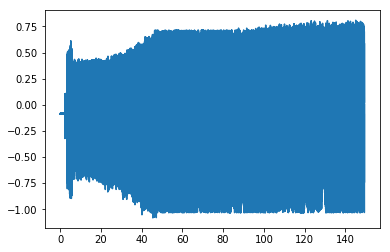

In [374]:
plt.plot(Time,V)

In [80]:
data = pd.read_csv('580rawDatalog_20190302143630_19-03-02_1437_006.LVM',header=None,sep='\t')

TypeError: read() got an unexpected keyword argument 'encoding'

## read with pandas

In [60]:
data = pd.read_csv('./data_5.csv',header=None)

In [61]:
Data = data[22:-1].iloc[:,2:4]
Data.columns = ['time','Votage']
time = np.array(Data['time'].values,dtype=float)
V = np.array(Data['Votage'].values,dtype=float)

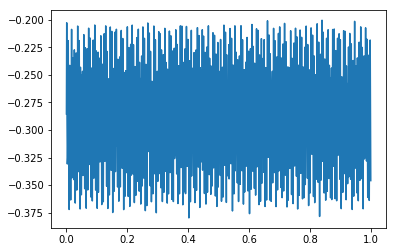

In [62]:
plt.plot(time[:1000],V[:1000])
# plt.xlim(0.0015,0.003)

In [36]:
index = np.where(V<-0.4)

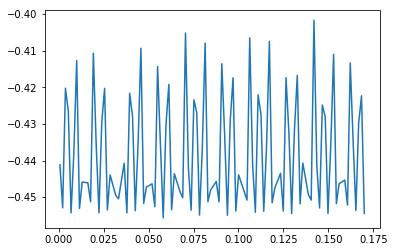

In [38]:
plt.plot(time[index][:100],V[index][:100])

In [397]:
alpha = np.arcsin(0.6)

In [398]:
(-np.cos(2*alpha)+1)*2*alpha/(4*np.pi)

0.07373979529168805

## 示波器

In [548]:
def processdata(filename):
    DATA = pd.read_csv(filename,header=None)
    data_all = np.array(DATA[2:][1].values,dtype=float)
    data_signal=data[np.where(data_all<-0.1)]
    #plt.plot(data_all)
    plt.plot(data_signal)
    ave=np.average(data_signal)
    std=np.std(data_signal)
    print (filename,'wavelen:',len(data_signal),'ave:',ave,'std:',std)
    
    return [data_signal,len(data_signal),ave,std]

('./c1.csv', 'wavelen:', 1267, 'ave:', -0.2596369376479874, 'std:', 0.015424357558472697)
('./c2.csv', 'wavelen:', 1000, 'ave:', -0.259604, 'std:', 0.01542709253229527)
('./c3.csv', 'wavelen:', 80, 'ave:', -0.2598, 'std:', 0.0153544781741354)
('./c4.csv', 'wavelen:', 190, 'ave:', -0.2590947368421052, 'std:', 0.01570589811048907)
('./c5.csv', 'wavelen:', 310, 'ave:', -0.25911612903225806, 'std:', 0.015589266298491618)
('./c6.csv', 'wavelen:', 410, 'ave:', -0.25914634146341464, 'std:', 0.015534793326217159)


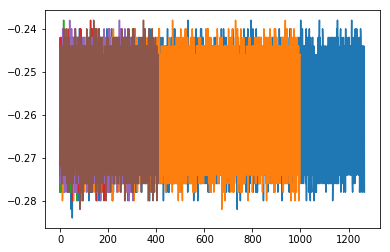

In [549]:
filename_osc=['./c%s.csv'%s for s in range(1,7)]

data_result=[]
for filename in filename_osc:
    data_result.append(processdata(filename))

In [550]:
lens=[data_result[i][1] for i in range(6)]
aves=[data_result[i][2] for i in range(6)]
stds=[data_result[i][3] for i in range(6)]

(-0.261, -0.258)

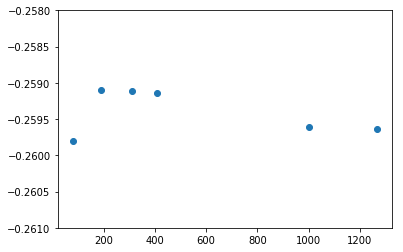

In [551]:
plt.scatter(lens,aves)
plt.ylim(-0.261,-0.258)

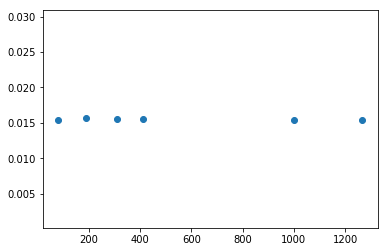

In [543]:
plt.scatter(lens,stds)